In [ ]:
import grand.dataio.root_files as grf
import ROOT

#fv = grf.FileEfield("/home/data/GRAND.TEST-RAW-10s-ChanXYZ-20dB-14dus.20230525063833.049_dat.root")

import matplotlib.pyplot as plt

#plt.plot(fv.traces[50, 0])

fv = grf.FileEfield("/home/data/test_efield.root")
fv.traces.shape

import matplotlib.pyplot as plt

plt.plot(fv.traces[50, 0])

handle_tr = fv.get_obj_handling3dtraces()
handle_tr.plot_trace_idx(50)

handle_tr.plot_trace_du(7)

import argparse
from typing import Union
import numpy as np
import grand.manage_log as mlg
from grand import Efield2Voltage

#from grand.io.root_files import FileSimuEfield, FileVoltageEvent

#from grand.simu.du.antenna_model import AntennaModelGP300

from grand.geo.coordinates import ECEF, Geodetic, GRANDCS, LTP

geod = Geodetic(latitude=41.26998, longitude=96.53029, height=0)

ecef = ECEF(geod)

#ecef = geod.geodetic to ecef()

from grand.geo.geomagnet import Geomagnet

geoB = Geomagnet(location=geod)

print(geoB.field, geoB.declination, geoB.inclination)

#elevation = topography.elevation(geod)

#from grand.simu.noise.galaxy import galaxy_radio_signal

from grand.sim.noise import galaxy

#gal_noise = galaxy(
#lst=18, 
#size_out=20, 
#freq_MHz=np.arange(30, 251, 1), 
#nb_ant=300 
#)

#galactic_noise(f_lst, size_out, freqs_mhz, nb_ant, seed=None)
#gal_noise = galactic_noise(
#lst=18, 
#size_out=20, 
#freq_MHz=np.arange(30, 251, 1), 
#nb_ant=300 
#)

from grand.sim.noise.galaxy import galactic_noise

import h5py
import numpy as np
from grand import grand_add_path_data

from grand.sim.noise.galaxy import interpol_at_new_x

#gal_noise = galactic_noise(
#lst=18, 
#size_out=20, 
#freq_MHz=np.arange(30, 251, 1), 
#nb_ant=300 
#)

gal_noise = galactic_noise(12, 20, np.arange(25, 251, 1), 300, seed=None)

noise_lst18 = np.real(gal_noise)[0,:]
freq_MHz=np.arange(25, 251, 1)

noise_lst18[0]

plt.plot(freq_MHz, noise_lst18[0])
plt.plot(freq_MHz, noise_lst18[1])
plt.plot(freq_MHz, noise_lst18[2])

from grand.sim.noise.galaxy import *
from scripts.plot_rf_chain import *
from scripts.plot_rf_chain import plot
plot("rf_chain",False)
#lna, balun_after_lna, cable, vga, balun_before_adc, rf_chain

from grand import (
    Coordinates,
    CartesianRepresentation,
    SphericalRepresentation,
    GeodeticRepresentation,
)
from grand import ECEF, Geodetic, GRANDCS, LTP
from grand import Geomagnet

import numpy as np
import datetime

import matplotlib.pyplot as plt

params = {
    "legend.fontsize": 16,
    "axes.labelsize": 22,
    "axes.titlesize": 17,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "figure.figsize": (12, 12),
    "axes.grid": True,
}
plt.rcParams.update(params)

cord1 = Coordinates(1)  # 3x1ndarray with random entries is formed in this example.
cord2 = Coordinates(5)  # 3x5 ndarray with random entries is formed in this example.

print("---------Basic Data Structure (Random Entries)---------")
print(cord1, type(cord1), "n=1\n")
print(cord2, type(cord2), "n=5\n")
print("Note that random values are automatically selected to fill the array.")

print("---------Cartesian Representation--------")
x = np.ones(5)  # [1. 1. 1. 1. 1.]
y = 1 + x  # [2. 2. 2. 2. 2.]
z = 1 + y  # [3. 3. 3. 3. 3.]

# forms 3xn ndarray ([[x1, x2, ..xn], [y1, y2, ..yn], [z1, z2, ..zn]], n=len(x))
cart1 = CartesianRepresentation(x=1, y=2, z=3)
cart2 = CartesianRepresentation(x=x, y=y, z=z)

print("\n-- 3x1 array. n=1")
print(cart1, type(cart1), "Initial")

print("--getter")
print(cart1.x, "X", type(cart1), "getter")
print(cart1.y, "Y", type(cart1), "getter")
print(cart1.z, "Z", type(cart1), "getter")

cart1.x = cart1.x ** 2
cart1.y = cart1.y ** 2
cart1.z = cart1.z ** 2
print("--setter")
print(cart1, type(cart1), "setter (squared)")

cts1a = cart1.cartesian_to_spherical()
cts1b = SphericalRepresentation(cart1)
print("--Cartesian to Spherical (theta, phi, r)")
print(cts1a, type(cts1a), "style 1")
print(cts1b, type(cts1b), "style 2")

print("\n-- 3x5 array. n=5")
print(cart2, type(cart2), "Initial")

print("--getter")
print(cart2.x, "X", type(cart2), "getter")
print(cart2.y, "Y", type(cart2), "getter")
print(cart2.z, "Z", type(cart2), "getter")

cart2.x = x * x
cart2.y = y * y
cart2.z = z * z
print("--setter")
print(cart2, type(cart2), "setter (squared)")
cts2a = cart2.cartesian_to_spherical()
cts2b = SphericalRepresentation(cart2)
print("--Cartesian to Spherical (theta, phi, r)")
print(cts2a, type(cts2a), "style 1")
print(cts2b, type(cts2b), "style 2")

from grand import Geomagnet, Geodetic

import numpy as np
import datetime

print("---------Geomagnetic Field--------")

# Define a location. More on this later. Location of equator and GRANDCS origin (approx.) is used.
loc1 = Geodetic(latitude=0, longitude=0, height=1)
loc2 = Geodetic(latitude=38.87253, longitude=92.35731, height=2797.026)  # possible GRANDCS origin.

# instantiate a global geomagnetic field based on a model, location and observation time.
# Model and observation time has default values ('IGRF13', datetime.date(2020, 1, 1)).
# Location must be provided. It can be given in ECEF, Geodetic, or GRAND coordinate system.
# Or location can be given as latitude (deg), longitude (deg), and height (m) asl.
# Observation time should be given in isoformat or in datetime.date().

geoB1 = Geomagnet(location=loc1)  # default model and obstime is used.

geoB2 = Geomagnet(latitude=0, longitude=0, height=1)  # default model and obstime is used.

geoB3 = Geomagnet(model="IGRF13", location=loc2, obstime="2021-08-30")
# or geoB3 = Geomagnet(location=loc2, obstime=datetime.date(2021, 8, 30))

geoB4 = Geomagnet(model="WMM2020", location=loc2, obstime="2021-08-30")

print("")
print("-- Magneitc Field (B)")
print(geoB1.field, type(geoB1.field))
print("-- Observation time")
print(geoB1.obstime, type(geoB1.obstime))
print("-- Location")
print(geoB1.location, type(geoB1.location))
print("--")
print(
    "Declination [deg]:",
    round(geoB1.declination, 3),
    ",  Inclination [deg]:",
    round(geoB1.inclination, 3),
)
print("....................\n")

print("-- Magneitc Field (B)")
print(geoB2.field, type(geoB2.field))
print("-- Observation time")
print(geoB2.obstime, type(geoB2.obstime))
print("-- Location")
print(geoB2.location, type(geoB2.location))
print("--")
print(
    "Declination [deg]:",
    round(geoB2.declination, 3),
    ",  Inclination [deg]:",
    round(geoB2.inclination, 3),
)
print("....................\n")

print("-- Magneitc Field (B) at GRANDCS Origin")
print(geoB3.field, type(geoB3.field))
print("-- Observation time")
print(geoB3.obstime, type(geoB3.obstime))
print("-- Location")
print(geoB3.location, type(geoB3.location))
print("-- ")
print(
    "Declination [deg]:",
    round(geoB3.declination, 5),
    ",  Inclination [deg]:",
    round(geoB3.inclination, 5),
)
print("....................\n")

print("-- Magneitc Field (B) at GRANDCS Origin. magnetic model: WMM2020")
print(geoB4.field, type(geoB4.field))
print("-- Observation time")
print(geoB4.obstime, type(geoB4.obstime))
print("-- Location")
print(geoB4.location, type(geoB4.location))
print("-- ")
print(
    "Declination [deg]:",
    round(geoB4.declination, 5),
    ",  Inclination [deg]:",
    round(geoB4.inclination, 5),
)
print("....................\n")


#from GrandRawRoot-main.CoREASRawRoot import CoreasRawToRawROOT

Welcome to JupyROOT 6.26/02


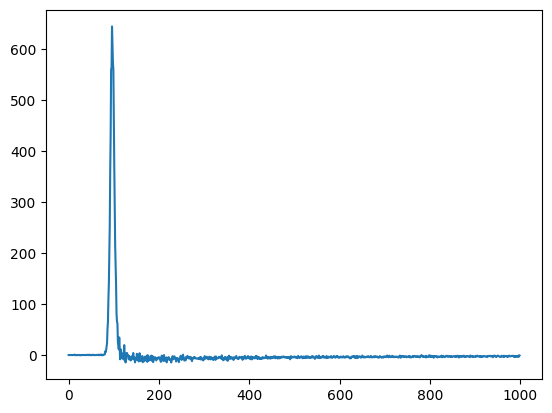

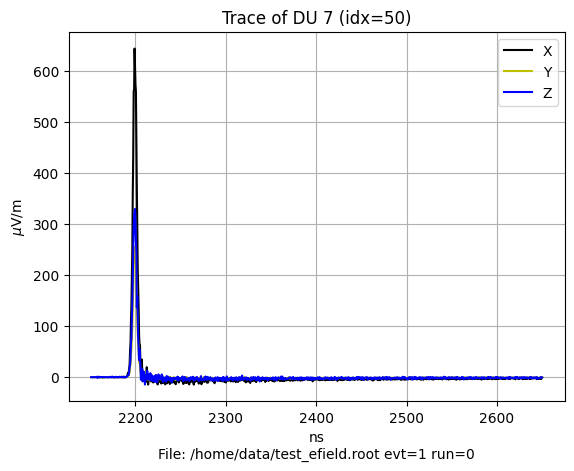

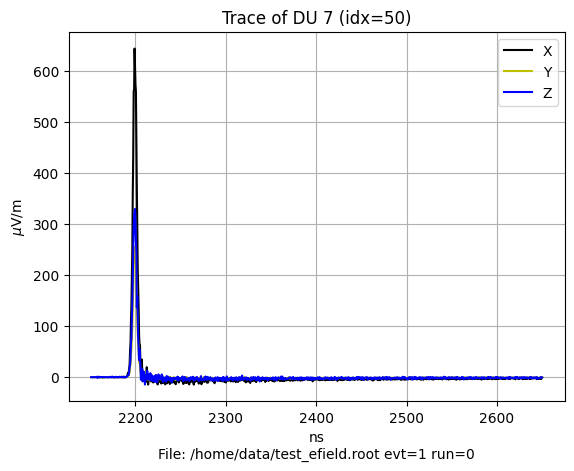

In [1]:
import grand.dataio.root_files as grf
import ROOT

#fv = grf.FileEfield("/home/data/GRAND.TEST-RAW-10s-ChanXYZ-20dB-14dus.20230525063833.049_dat.root")

import matplotlib.pyplot as plt

#plt.plot(fv.traces[50, 0])

fv = grf.FileEfield("/home/data/test_efield.root")
fv.traces.shape

import matplotlib.pyplot as plt

plt.plot(fv.traces[50, 0])

handle_tr = fv.get_obj_handling3dtraces()
handle_tr.plot_trace_idx(50)

handle_tr.plot_trace_du(7)

In [9]:
from grand.geo.coordinates import ECEF, Geodetic, GRANDCS, LTP

In [17]:
#from sim2root.CoREASRawRoot.coreas_pipeline import 

11:13:59.941  INFO [grand.manage_log 187] create handler for root logger: ['grand']
11:13:59.953  INFO [grand.sim.detector.rf_chain 473] vga gain: 20 dB
11:13:59.961 DEBUG [grand.sim.detector.rf_chain 200] (291, 9)


Parameters of total RF Chain


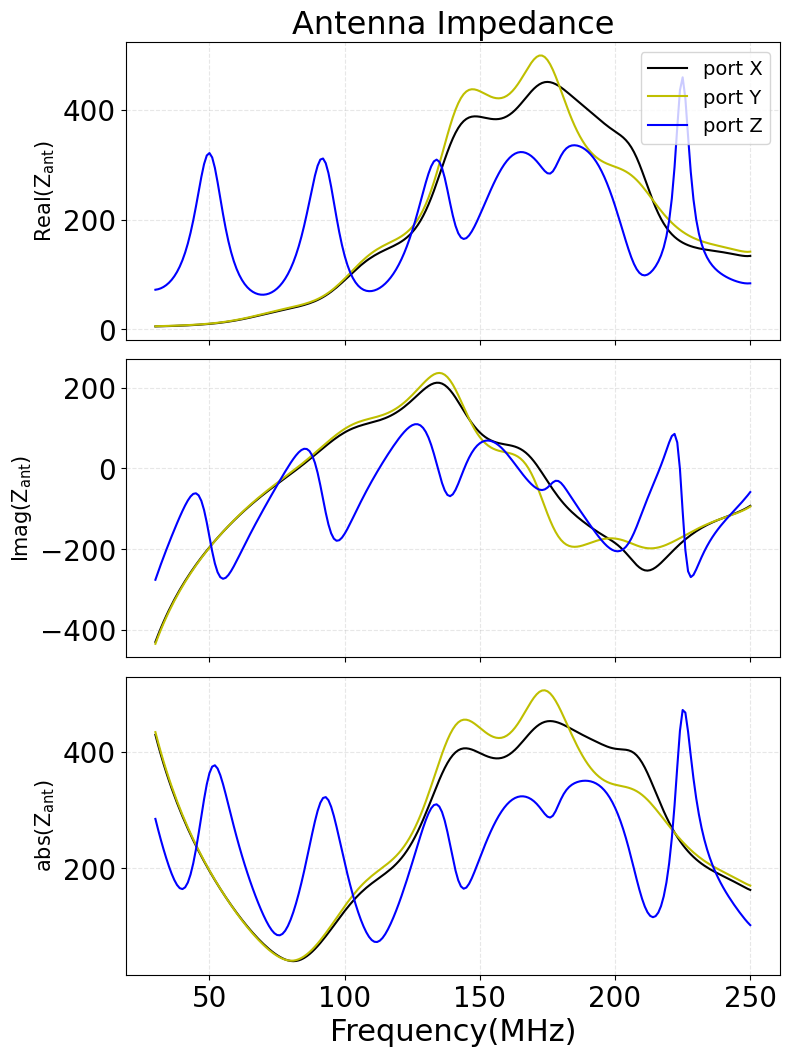

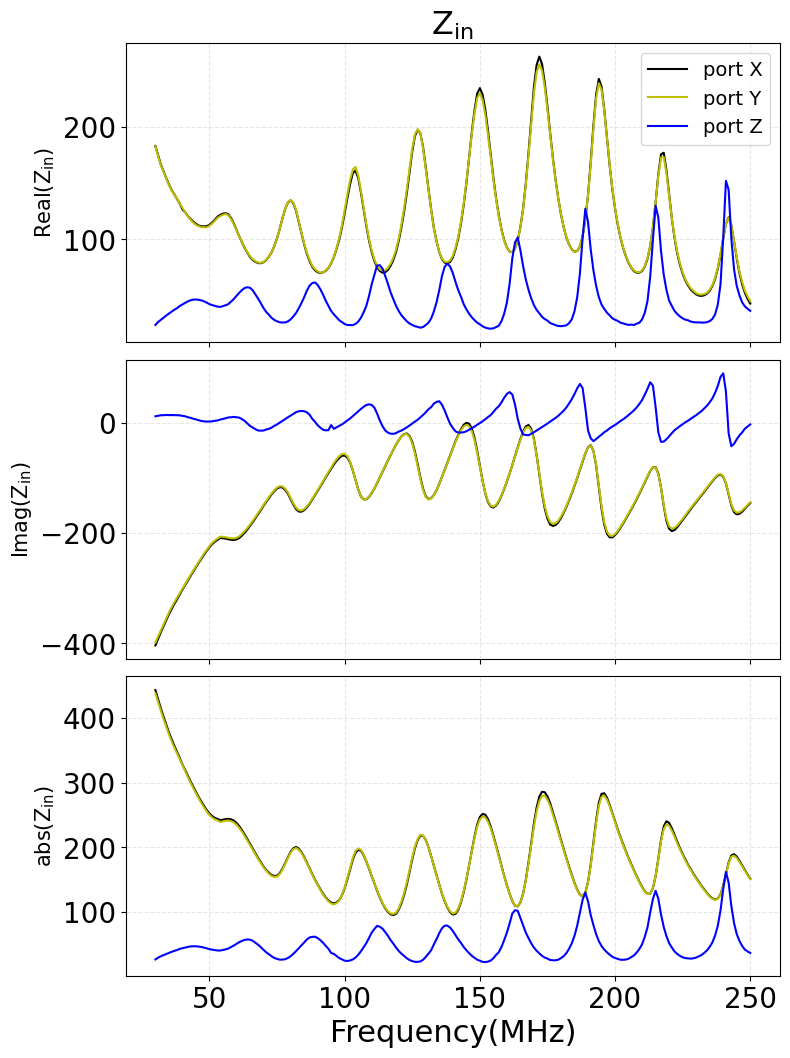

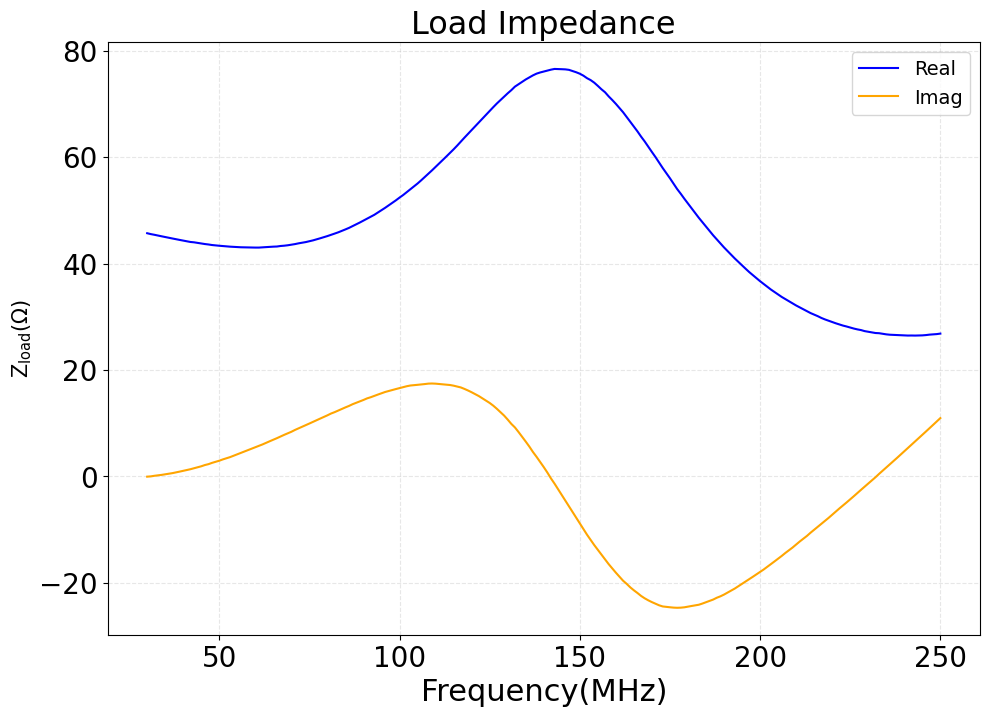

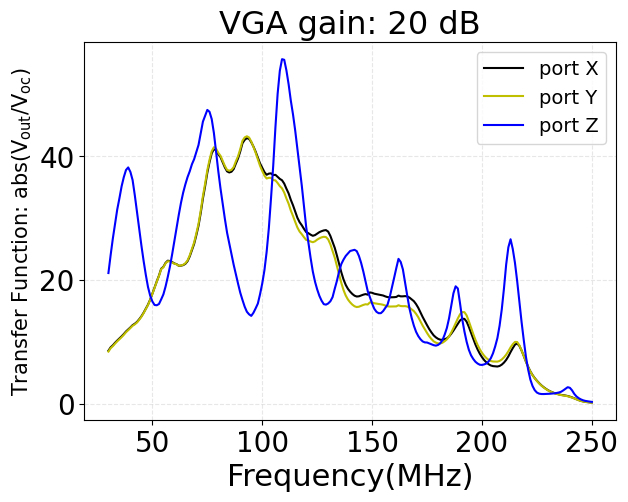

In [18]:
from grand.sim.noise.galaxy import *
from scripts.plot_rf_chain import *
from scripts.plot_rf_chain import plot
plot("rf_chain",False)